# Calculate an Advance Decline Line
### To-do:
    - FIXED! Why is not the index starting at 1990? Instead the end of 1999 is being used. 
    - Do a AD line for the Wilshire 5000, and Nasdaq Composite

In [21]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt #used for the indices 


In [22]:
#Input
inputfolder = '..\\Data\\SP500/'
a4_dims = (11.7, 8.27) #Figure size for plot

#Output
myPath = %pwd
outputSubFolder = '..\\Data\\TechnicalAnalysisData\\'
if not os.path.exists(outputSubFolder):
    os.makedirs(outputSubFolder)
AD_filename = 'AD_line_S&P500.csv'

In [23]:
#%%timeit
def initADLine(folder):

    ADframe = pd.DataFrame()
    for filename in os.listdir(inputfolder):
        if filename.endswith('.csv'):
            companyName = filename[:-4]
            df = pd.read_csv(folder+filename, index_col=0, parse_dates=True)
            if df.empty == True:
                print('DataFrame empty for company name: {}'.format(companyName))
            else:
                if (ADframe.empty) or (df.index[1] >=  ADframe.index[1]):
                    ADframe[companyName] =(df['Adj Close'].shift(1) < df['Adj Close'])*1 + (df['Adj Close'].shift(1) > df['Adj Close'])*(-1)
                else:
                    right = (df['Adj Close'].shift(1) <  df['Adj Close'])*1 +(df['Adj Close'].shift(1) >  df['Adj Close'])*(-1)
                    right.name = companyName
                    ADframe = ADframe.join(right,how='outer')

    ADframe.fillna(0, inplace=True)
    ADline=np.cumsum(ADframe.sum(axis=1))
    ADline.name = 'A/D-line'
    
    return (ADline, ADframe)

In [25]:
def saveDataFrame(df, relativePath, filename):
    myPath = %pwd
    ADline.to_csv(relativePath+filename)
    print('Saved {} to path: {}'.format(filename, relativePath[:-1]))

In [17]:
os.path.exists(outputSubFolder)


False

In [13]:
%ls ..\\Data\\

 Volume in drive C is Windows
 Volume Serial Number is AE86-259E

 Directory of c:\Users\david\OneDrive\Code\StockAnalysis\Data\SP500

2021-10-28  18:36    <DIR>          .
2021-10-28  18:36    <DIR>          ..
2021-06-10  21:05           610,084 A.csv
2021-06-10  21:13           434,548 AAL.csv
2021-06-10  21:41           539,835 AAP.csv
2021-06-10  21:41           891,157 AAPL.csv
2021-06-10  21:41           231,425 ABBV.csv
2021-06-10  21:41           665,227 ABC.csv
2021-06-10  21:41           684,417 ABMD.csv
2021-06-10  21:41           894,401 ABT.csv
2021-06-10  21:41           545,516 ACN.csv
2021-06-10  21:41           762,848 ADBE.csv
2021-06-10  21:41           789,311 ADI.csv
2021-06-10  21:41           883,685 ADM.csv
2021-06-10  21:41           891,973 ADP.csv
2021-06-10  21:41           541,421 ADS.csv
2021-06-10  21:41           751,257 ADSK.csv
2021-06-10  21:41           611,643 AEE.csv
2021-06-10  21:42           742,371 AEP.csv
2021-06-10  21:42           764,786 A

In [26]:
(ADline, _) = initADLine(inputfolder)
ADline.head()

Date
1990-01-02      0.0
1990-01-03     11.0
1990-01-04    -37.0
1990-01-05   -117.0
1990-01-08    -86.0
Name: A/D-line, dtype: float64

In [27]:
saveDataFrame(ADline, outputSubFolder, AD_filename)

Saved AD_line_S&P500.csv to path: ..\Data\TechnicalAnalysisData


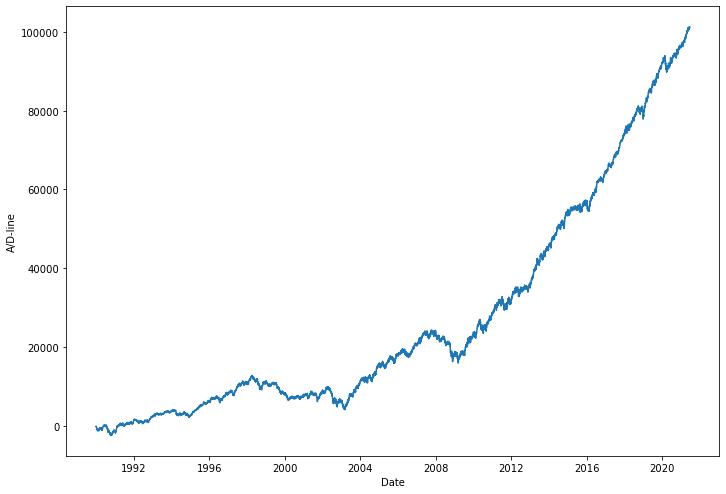

In [28]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=ADline, ax=ax)